In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [3]:
# Load and merge datasets
orders_df = pd.read_csv('Orders.csv')
details_df = pd.read_csv('Details.csv')
merged_df = pd.merge(orders_df, details_df, on='Order ID')

In [ ]:
# Data Wrangling and Exploration
# Check for missing values, duplicates, and basic info
print("Missing values:\n", merged_df.isnull().sum())
print("\nData Information:\n")
print(merged_df.info())
print("\nFirst 5 rows of data:\n", merged_df.head())
print("\nData Summary:\n", merged_df.describe())

# Sum of Amount, Quantity, and Profit
total_amount = merged_df['Amount'].sum()
total_quantity = merged_df['Quantity'].sum()
total_profit = merged_df['Profit'].sum()
print(f"\nTotal Amount: {total_amount}, Total Quantity: {total_quantity}, Total Profit: {total_profit}")

Missing values:
 Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Order Date    1500 non-null   object
 2   CustomerName  1500 non-null   object
 3   State         1500 non-null   object
 4   City          1500 non-null   object
 5   Amount        1500 non-null   int64 
 6   Profit        1500 non-null   int64 
 7   Quantity      1500 non-null   int64 
 8   Category      1500 non-null   object
 9   Sub-Category  1500 non-null   object
 10  PaymentMode   1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB
None

First 5 rows of data:
   Order ID  Order 

In [14]:
# Convert 'Order Date' to datetime format
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'], format='%d-%m-%Y')
# Drop duplicates
merged_df.drop_duplicates(inplace=True)
# Fill missing values
merged_df.fillna(method='ffill', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\1608456753.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9744\1524780566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMode', data=merged_df, order=payment_mode_order, palette='viridis')


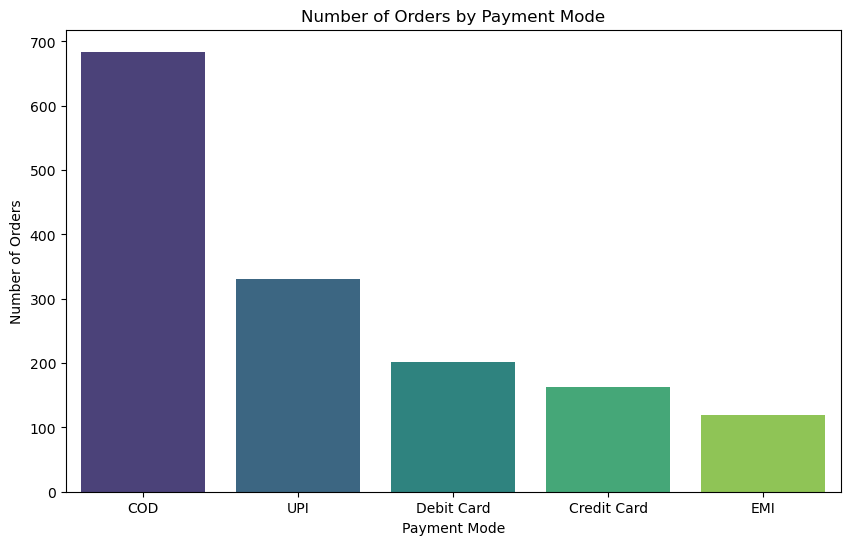

In [78]:
# Descriptive Analysis - Visualizations
# Bar plot for Payment Mode (ordered from highest to lowest)
plt.figure(figsize=(10, 6))

# Count and sort PaymentMode in descending order
payment_mode_order = merged_df['PaymentMode'].value_counts().index

# Plot with ordered categories
sns.countplot(x='PaymentMode', data=merged_df, order=payment_mode_order, palette='viridis')
plt.title('Number of Orders by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.show()


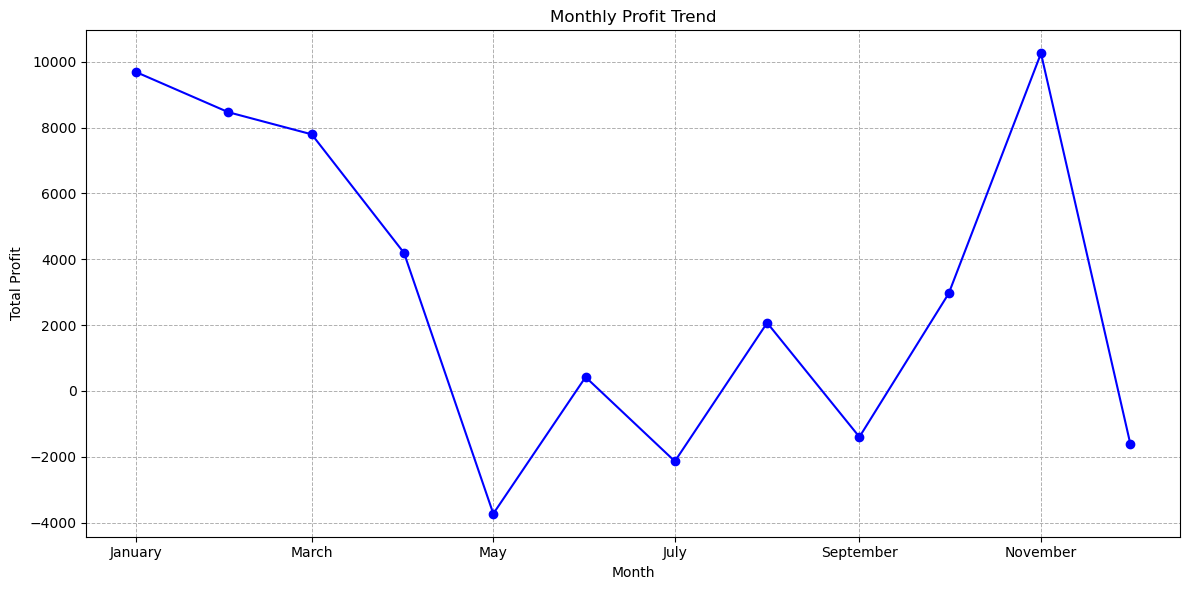

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
profit_trend = merged_df.groupby(merged_df['Order Date'].dt.to_period('M'))['Profit'].sum()

plt.figure(figsize=(12, 6))
plt.plot(profit_trend.index.to_timestamp(), profit_trend.values, marker='o', color='b')

# Set title and labels
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Enable grid on both major axes
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Format x-axis labels to show month names
date_format = DateFormatter("%B")
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

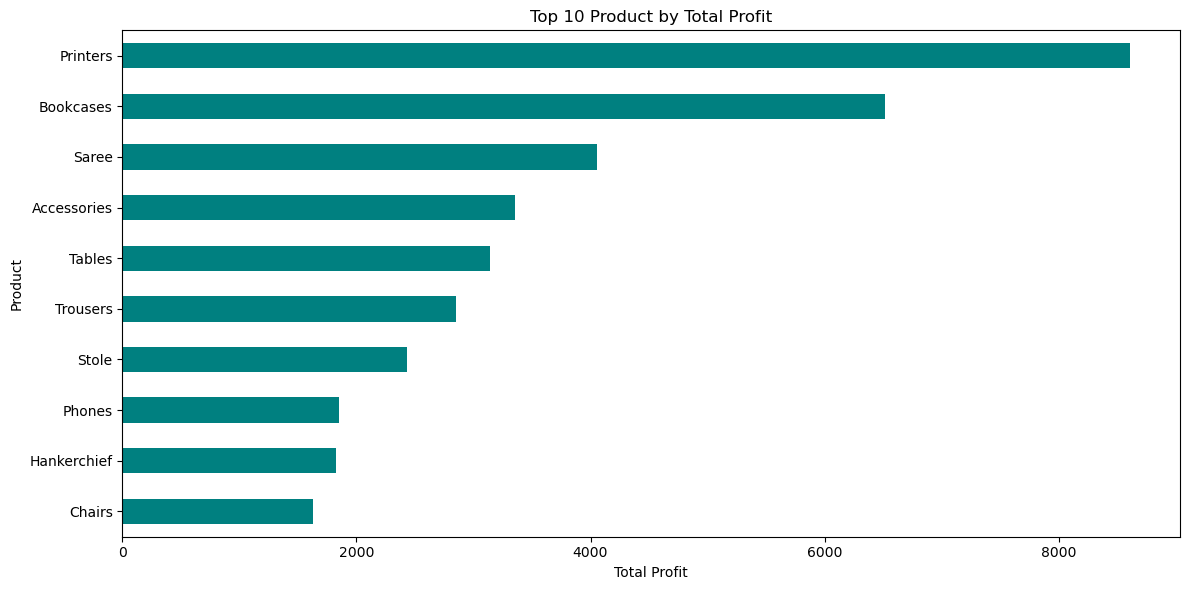

In [ ]:
# Sum of Profit by Sub-Category (Top 10 in Descending Order, Horizontal)
plt.figure(figsize=(12, 6))
profit_by_subcategory = merged_df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
profit_by_subcategory.plot(kind='barh', color='teal')  # Set kind to 'barh' for horizontal bar chart
plt.title('Top 10 Product by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5900\2390906004.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=merged_df,order=category_order, palette='viridis')


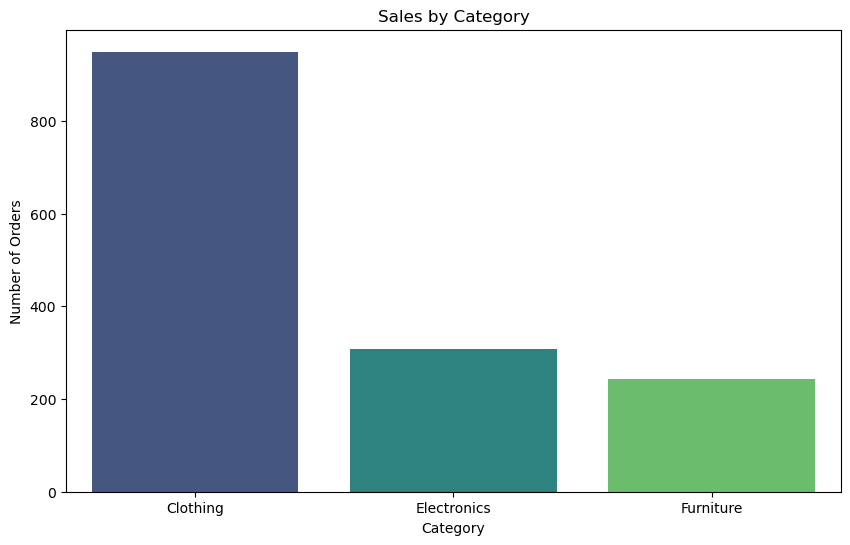

In [10]:
# Number of Orders by Category
plt.figure(figsize=(10, 6))
category_order = merged_df['Category'].value_counts().index

sns.countplot(x='Category', data=merged_df,order=category_order, palette='viridis')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     46.06
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          4.22e-146
Time:                        22:21:14   Log-Likelihood:                -8707.9
No. Observations:                1200   AIC:                         1.746e+04
Df Residuals:                    1176   BIC:                         1.759e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.7437     15.720     11.561      0.0

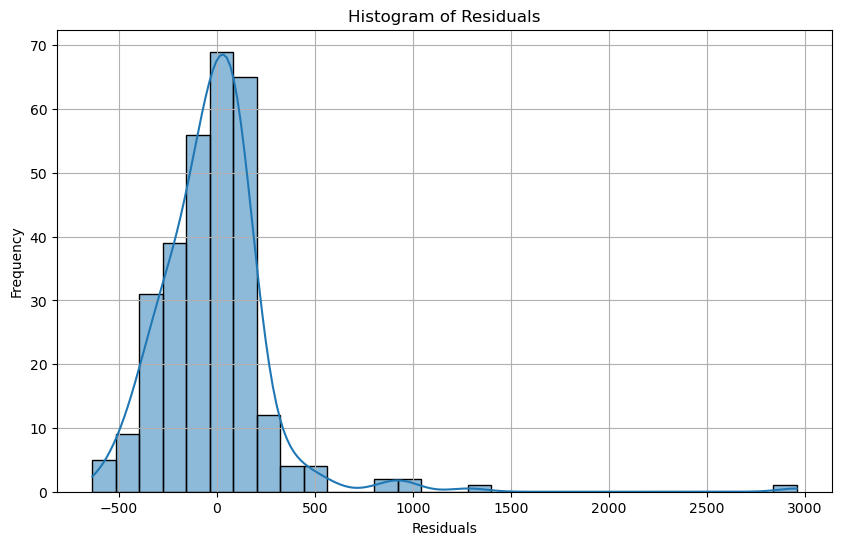

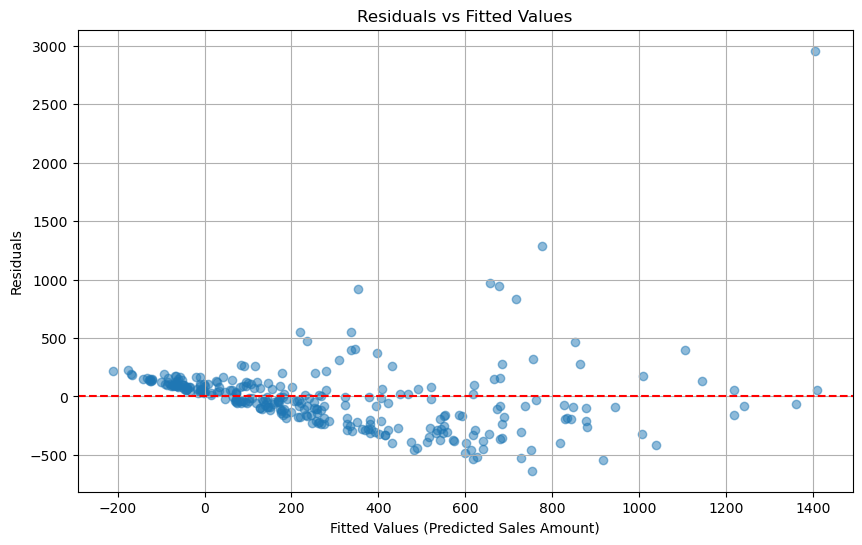

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# Feature engineering - add new features from 'Order Date'
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])
merged_df['OrderMonth'] = merged_df['Order Date'].dt.month
merged_df['OrderDayOfWeek'] = merged_df['Order Date'].dt.dayofweek

# Define features and target variable
features = ['Quantity', 'Category', 'Sub-Category', 'PaymentMode', 'OrderMonth', 'OrderDayOfWeek']
target = 'Amount'

# Preprocessing pipeline for sklearn models
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Quantity', 'OrderMonth', 'OrderDayOfWeek']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Category', 'Sub-Category', 'PaymentMode'])
    ]
)

# Split data into train and test sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training data for statsmodels
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_transformed = sm.add_constant(X_train_transformed)  # Add constant for intercept

# Use statsmodels to fit and print the summary for Linear Regression
ols_model = sm.OLS(y_train, X_train_transformed).fit()
print(ols_model.summary())  # Print OLS Regression results

# Fit the model using sklearn pipeline for predictions
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred



# Plot 1: Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot 2: Scatter plot of residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted Sales Amount)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

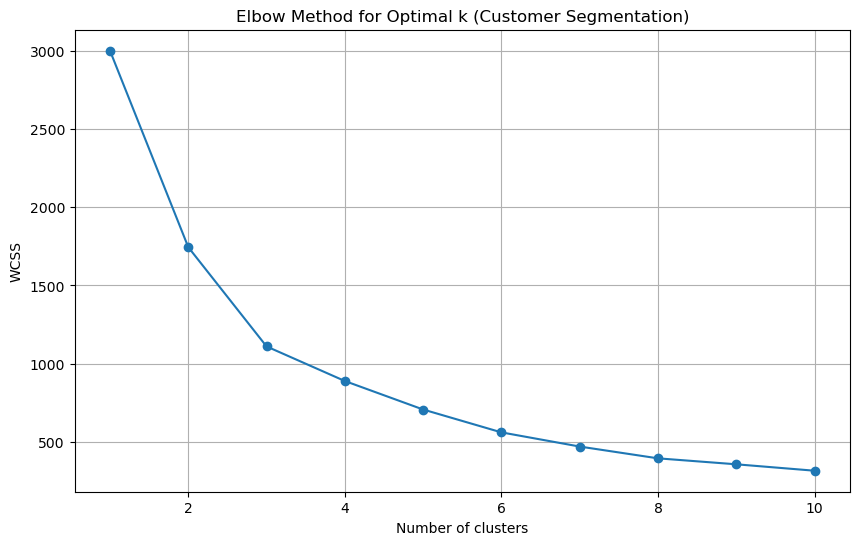

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Silhouette Score for Customer Segmentation (k=3): 0.53


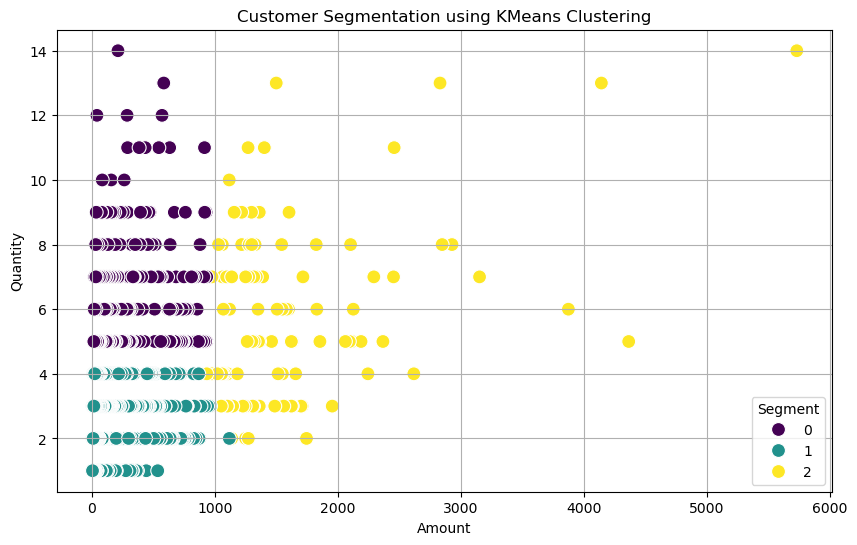

In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Customer Segmentation Features
customer_features = ['Amount', 'Quantity']
X_customer = merged_df[customer_features]

# Standardize the features
scaler = StandardScaler()
X_scaled_customer = scaler.fit_transform(X_customer)

# Determine the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled_customer)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k (Customer Segmentation)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Choose optimal_k based on the Elbow plot (e.g., 3 or 4)
optimal_k = 3
kmeans_customer = KMeans(n_clusters=optimal_k, random_state=42)
merged_df['Customer Segment'] = kmeans_customer.fit_predict(X_scaled_customer)

# Calculate silhouette score
sil_score_customer = silhouette_score(X_scaled_customer, merged_df['Customer Segment'])
print(f"Silhouette Score for Customer Segmentation (k={optimal_k}): {sil_score_customer:.2f}")

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Quantity', hue='Customer Segment', data=merged_df, palette='viridis', s=100)
plt.title('Customer Segmentation using KMeans Clustering')
plt.xlabel('Amount')
plt.ylabel('Quantity')
plt.legend(title='Segment')
plt.grid()
plt.show()
